
"""

This CODE USES :

- Raw file(s) such as DogResults which get created in 


"""


In [4]:

import os
from pprint import pprint



# Import the code 


In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
codeloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Code'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Code', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [10]:

outloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Dataprep'


In [11]:

pprint(os.listdir(outloc))


Pretty printing has been turned OFF


In [4]:

class Data(object):
    pass

df = Data
summ = Data


In [5]:
import helpdesk as hd

In [6]:

import pandas as pd, numpy as np, os
from datetime import datetime


In [7]:
DEBUG = True

In [8]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


#### Importing : dog details

In [20]:

# Importing Dog Race Results

#res_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\dog_results_20211201_20211231.csv')
#df.res_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\dog_results_20220101_20220531.csv')

print(f'{fileloc}/dog_results_2012Q1_2021Q4.csv')

df.res_raw_2021Q1Q4 = pd.read_csv(f'{fileloc}/dog_results_2021Q1_2021Q4.csv')
print(df.res_raw_2021Q1Q4.columns.values.tolist())
print(df.res_raw_2021Q1Q4.shape)

print(f'{fileloc}/dog_results_2022Q1_2022Q2.csv')
df.res_raw_2022Q1Q2 = pd.read_csv(f'{fileloc}/dog_results_2022Q1_2022Q2.csv')
print(df.res_raw_2022Q1Q2.columns.values.tolist())
print(df.res_raw_2022Q1Q2.shape)

print(f'{fileloc}/dog_results_2022Q3_2022Q4.csv')
df.res_raw_2022Q3Q4 = pd.read_csv(f'{fileloc}/dog_results_2022Q3_2022Q4.csv')
print(df.res_raw_2022Q3Q4.columns.values.tolist())
print(df.res_raw_2022Q3Q4.shape)

print(f'{fileloc}/dog_results_2023M1.csv')
df.res_raw_2023M1 = pd.read_csv(f'{fileloc}/dog_results_2023M1.csv')
print(df.res_raw_2023M1.columns.values.tolist())
print(df.res_raw_2023M1.shape)



/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/dog_results_2012Q1_2021Q4.csv
['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
(435715, 19)
/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/dog_results_2022Q1_2022Q2.csv
['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
(320052, 19)
/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/dog_results_2022Q3_2022Q4.csv
['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'T

In [21]:

df.res_raw = df.res_raw_2021Q1Q4.append( df.res_raw_2022Q1Q2 ).append( df.res_raw_2022Q3Q4 )\
            .append( df.res_raw_2023M1 )

print( df.res_raw.columns.values.tolist() )
print( df.res_raw.shape )


['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
(902379, 19)


In [22]:

df.res_raw.loc[:,"DogName"] = df.res_raw["DogName"].str.replace("'","").str.replace(".","")
if DEBUG: print(df.res_raw.shape) 
# 320 052
# 826 584
# 884 502

#if DEBUG: res_raw[ ~(res_raw.Place.isin( ['D','F','N','R','S','T',''])) ].shape # 66608
if DEBUG: print(df.res_raw[ ~(df.res_raw.Place.isin( ['R','S'])) ].shape) 
# 275 864
# 710 179
# 759 770 Including 2023M1D15

df.res_raw2 = df.res_raw[ ~(df.res_raw.Place.isin( ['R','S']))  ]
df.res_ = df.res_raw2[~df.res_raw2.Place.isna()]
if DEBUG: print(df.res_.shape) 
# 273 735
# 705 255
# 754 691 Including 2023M1D15

del df.res_raw, df.res_raw2

#res_ = res_raw


(902379, 19)
(775223, 19)
(769826, 19)


In [24]:

# Importing DogGrade information

print(f'{fileloc}/doggradeinfo_20210101_to_20230130.csv')
df_doggrade_full_raw = pd.read_csv(f'{fileloc}/doggradeinfo_20210101_to_20230130.csv')

print(df_doggrade_full_raw.shape)
print()
print(df_doggrade_full_raw.columns.values.tolist())


/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/doggradeinfo_20210101_to_20230130.csv
(915640, 7)

['@id', 'RaceId', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE']


In [25]:

# Merging Doggrade into the "Dogs Base"

print(df.res_.columns.values.tolist())
print(df_doggrade_full_raw.columns.values.tolist())

print()

print(df.res_.shape)
print(df_doggrade_full_raw.shape)

print()

df_dogs_base = pd.merge( df.res_, df_doggrade_full_raw, on = ['@id','RaceId'], how = 'left')

print(df_dogs_base.shape)
print()
print(df_dogs_base.columns.values.tolist())
print()


['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
['@id', 'RaceId', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE']

(769826, 19)
(915640, 7)

(769826, 24)

['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE']



In [26]:

print(pd.DataFrame(df_dogs_base.isna().sum()).transpose())


   @id  Place  DogName  Box  Rug  Weight  StartPrice  Handicap  Margin1  Margin2    PIR  Checks  Comments  SplitMargin  RunTime  Prizemoney  RaceId  TrainerId  TrainerName  RaceBox  Rating  \
0    0      0        0    0    0    1121        6918    769826     7824   114777  93156       0    415589       187770     7609      221926       0          0            1     2595    4279   

   DogGrade  DogGOBIS  DogPRIZE  
0      2596      2595      2595  


In [27]:

df_dogs_base.dtypes


@id              int64
Place           object
DogName         object
Box            float64
Rug              int64
Weight         float64
StartPrice      object
Handicap       float64
Margin1        float64
Margin2        float64
PIR             object
Checks           int64
Comments        object
SplitMargin    float64
RunTime        float64
Prizemoney     float64
RaceId           int64
TrainerId        int64
TrainerName     object
RaceBox        float64
Rating         float64
DogGrade        object
DogGOBIS        object
DogPRIZE       float64
dtype: object

In [28]:

df_dogs_base['DogGrade'].fillna('M', inplace = True)
df_dogs_base['Rating'].fillna(0.00, inplace = True)


In [29]:

print( pd.DataFrame(df_dogs_base.isna().sum()).transpose())


   @id  Place  DogName  Box  Rug  Weight  StartPrice  Handicap  Margin1  Margin2    PIR  Checks  Comments  SplitMargin  RunTime  Prizemoney  RaceId  TrainerId  TrainerName  RaceBox  Rating  \
0    0      0        0    0    0    1121        6918    769826     7824   114777  93156       0    415589       187770     7609      221926       0          0            1     2595       0   

   DogGrade  DogGOBIS  DogPRIZE  
0         0      2595      2595  


#### Importing : race details

In [30]:

# Importing Race Details 

#race_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\race_details_20211201_20211231.csv', parse_dates = True)
#df.race_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\race_details_20220101_20220531.csv', parse_dates = True)

print()
print(f'{fileloc}/race_details_2021Q1_2021Q4.csv')
df.race_raw_2021Q1Q4 = pd.read_csv(f'{fileloc}/race_details_2021Q1_2021Q4.csv', parse_dates = True)
print(df.race_raw_2021Q1Q4.columns.values.tolist())
print(df.race_raw_2021Q1Q4.shape)

print()
print(f'{fileloc}/race_details_2022Q1_2022Q2.csv')
df.race_raw_2022Q1Q2 = pd.read_csv(f'{fileloc}/race_details_2022Q1_2022Q2.csv', parse_dates = True)
print(df.race_raw_2022Q1Q2.columns.values.tolist())
print(df.race_raw_2022Q1Q2.shape)

print()
print(f'{fileloc}/race_details_2022Q3_2022Q4.csv')
df.race_raw_2022Q3Q4 = pd.read_csv(f'{fileloc}/race_details_2022Q3_2022Q4.csv', parse_dates = True)
print(df.race_raw_2022Q3Q4.columns.values.tolist())
print(df.race_raw_2022Q3Q4.shape)

print()
print(f'{fileloc}/race_details_2023M1.csv')
df.race_raw_2023M1 = pd.read_csv(f'{fileloc}/race_details_2023M1.csv', parse_dates = True)
print(df.race_raw_2023M1.columns.values.tolist())
print(df.race_raw_2023M1.shape)



/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/race_details_2021Q1_2021Q4.csv
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(51833, 8)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/race_details_2022Q1_2022Q2.csv
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(38562, 8)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/race_details_2022Q3_2022Q4.csv
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(13172, 8)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/race_details_2023M1.csv
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(4274, 8)


In [34]:

df.race_raw = df.race_raw_2021Q1Q4.append( df.race_raw_2022Q1Q2 ).append( df.race_raw_2022Q3Q4 )\
        .append( df.race_raw_2023M1)

print(df.race_raw.columns.values.tolist())
print(df.race_raw.shape)


['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(107841, 8)


In [35]:

df.race_raw['Event_Dt'] = pd.to_datetime(df.race_raw['date']).dt.date

#dtvalct = race_raw.Event_Dt.value_counts()

df.race_raw.loc[df.race_raw.Track.isin(['Murray Bridge (MBR)','Murray Bridge (MBS)']), "Track"] = 'Murray Bridge'
df.race_raw.loc[df.race_raw.Track.isin(['Richmond (RIS)']), "Track"] = 'Richmond'

df.race_raw.loc[df.race_raw.Track.isin(['Sandown (SAP)']), "Track"] = 'Sandown Park'

df.race_raw.loc[df.race_raw.Track.isin(['Meadows (MEP)']), "Track"] = 'Meadows'
df.race_raw.loc[df.race_raw.Track.isin(['The Meadows']), "Track"] = 'Meadows'


if DEBUG : print(df.race_raw.shape)

# 2021
# 52,103 Races

# 2022 upto May
# 21,002 Races

# 2022 Q1/Q2
# 38,562 Races

# 2022 Q1/Q2 + 2021 Q1/Q2/Q3/Q4
# 81,412 Races

# 2022 Q1/Q2/Q3/M11 + 2021 Q1/Q2/Q3/Q4
# 98805 (AUS + NZ), 89098 (AUS)

# 2023 M1 + 2022 Q1/Q2/Q3/Q4 + 2021 Q1/Q2/Q3/Q4
# 107841 (AUS + NZ), 97284 (AUS)

df.race_ = df.race_raw[ ~df.race_raw.Track.str.contains('NZ')]
#df.race_ = df.race_raw

if DEBUG : print(df.race_.shape)

del df.race_raw

if DEBUG: print(df.race_.dtypes)



(107841, 9)
(97284, 9)
@id           int64
RaceNum       int64
RaceName     object
RaceTime     object
Distance     object
RaceGrade    object
Track        object
date         object
Event_Dt     object
dtype: object


In [36]:

# Importing RaceGrade information 

print(f'{fileloc}/racegradeinfo_20210101_to_20230130.csv')
df_racegrade_full_raw = pd.read_csv(f'{fileloc}/racegradeinfo_20210101_to_20221214.csv')

print(df_racegrade_full_raw.shape)
print()
print(df_racegrade_full_raw.columns.values.tolist())
print()


/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/racegradeinfo_20210101_to_20230130.csv
(102693, 15)

['@id', 'RaceNum', 'RaceName', 'RaceTime', 'RaceTimeDateUTC', 'Distance', 'RaceGrade', 'GOBIS', 'Hurdle', 'Handicap', 'TAB', 'GradeCode', 'Track', 'Date', 'racetime_fix']



In [37]:

# Merging Racegrade into the "Race Base"

print(df.race_.columns.values.tolist())
print(df_racegrade_full_raw.columns.values.tolist())

print()

print(df.race_.shape)
print(df_racegrade_full_raw.shape)

print()

drop_duplicate_cols = ['RaceNum','RaceName','RaceTime','Distance','RaceGrade','Track','Date']
df_race_base = pd.merge( df.race_, df_racegrade_full_raw.drop(columns = drop_duplicate_cols), on = ['@id'] , how = 'left')

print(df_race_base.shape)
print()
print(df_race_base.columns.values.tolist())
print()


['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt']
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'RaceTimeDateUTC', 'Distance', 'RaceGrade', 'GOBIS', 'Hurdle', 'Handicap', 'TAB', 'GradeCode', 'Track', 'Date', 'racetime_fix']

(97284, 9)
(102693, 15)

(97284, 16)

['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap', 'TAB', 'GradeCode', 'racetime_fix']



In [38]:

print( pd.DataFrame(df_race_base.isna().sum()).transpose())


   @id  RaceNum  RaceName  RaceTime  Distance  RaceGrade  Track  date  Event_Dt  RaceTimeDateUTC  GOBIS  Hurdle  Handicap    TAB  GradeCode  racetime_fix
0    0        0         2         0         0          0      0     0         0             6354  97284   97284     97284  67502       6354          6354


In [39]:

print(df_race_base.GradeCode.value_counts())


5         23504
M          9229
X45        8428
6          4062
5H         3791
          ...  
X456H         2
MDNPWF        2
CINVH         2
CINVF         1
X456F         1
Name: GradeCode, Length: 106, dtype: int64


In [40]:

df_race_base['GradeCode'].fillna('0.00',inplace = True)


In [41]:

print( pd.DataFrame(df_race_base.isna().sum()).transpose())


   @id  RaceNum  RaceName  RaceTime  Distance  RaceGrade  Track  date  Event_Dt  RaceTimeDateUTC  GOBIS  Hurdle  Handicap    TAB  GradeCode  racetime_fix
0    0        0         2         0         0          0      0     0         0             6354  97284   97284     97284  67502          0          6354


### Merging : Race base and Dog base

In [42]:

print(df_dogs_base.shape)
print(df_race_base.shape)
print()

print(df_dogs_base.columns.values.tolist())
print(df_race_base.columns.values.tolist())
print()

#df_base_raw = pd.merge(df_dogs_base, df_race_base, left_on = 'RaceId', right_on = '@id', how = 'left', suffixes=('_DOG', '_RACE')) # Some races arent in the DOGS dataset
df_base_raw = pd.merge(df_dogs_base, df_race_base, left_on = 'RaceId', right_on = '@id', how = 'inner', suffixes=('_DOG', '_RACE')) # Only

print(df_base_raw.shape)
print()

print(df_base_raw.columns.values.tolist())
print()

# 2021
# 333,285

# 2022 upto May
# 132,558

# 2022 Q1/Q2
# 245,827

# 2022 Q1/Q2 + 2021 Q1/Q2/Q3/Q4
# 245,827

# 2022 Q1/Q2/Q3/M11 + 2021 Q1/Q2/Q3/Q4
# 245,827
# 632,501

# 2023 M1 + 2022 Q1/Q2/Q3/Q4 + 2021 Q1/Q2/Q3/Q4
# 245,827
# 632,501
# 769,826

#qc_DogName = df.ft_merg.DogName.value_counts()


(769826, 24)
(97284, 16)

['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE']
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap', 'TAB', 'GradeCode', 'racetime_fix']

(690792, 40)

['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix']



In [43]:

print( pd.DataFrame(df_base_raw.isna().sum()).transpose())


   @id_DOG  Place  DogName  Box  Rug  Weight  StartPrice  Handicap_DOG  Margin1  Margin2    PIR  Checks  Comments  SplitMargin  RunTime  Prizemoney  RaceId  TrainerId  TrainerName  RaceBox  Rating  \
0        0      0        0    0    0    1121        5404        690792     7341   103855  93155       0    336555       118840     7156      221473       0          0            0     2170       0   

   DogGrade  DogGOBIS  DogPRIZE  @id_RACE  RaceNum  RaceName  RaceTime  Distance  RaceGrade  Track  date  Event_Dt  RaceTimeDateUTC   GOBIS  Hurdle  Handicap_RACE     TAB  GradeCode  racetime_fix  
0         0      2170      2170         0        0        15         0         0          0      0     0         0            44920  690792  690792         690792  478345          0         44920  


In [44]:

# Find number of races with blank RaceGrade

print(len(df_base_raw['RaceId'].unique().tolist()))
print(len(df_base_raw[df_base_raw['RaceGrade'].isna()]['RaceId'].unique().tolist()))


96687
0


In [45]:

df_missing_racegrade = df_base_raw[df_base_raw['RaceGrade'].isna()]

print(df_missing_racegrade.shape)
print()
print(df_missing_racegrade.columns.values.tolist())
print()



(0, 40)

['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix']



In [46]:

df_missing_racegrade.groupby('Event_Dt').agg( {'@id_DOG':'nunique', '@id_RACE':'nunique'}).rename(columns = {'@id_DOGS':'num_dogs', '@id_RACE':'num_races'})


,@id_DOG,num_races
Event_Dt,,


In [47]:

df_base_raw.groupby('Event_Dt').agg( {'@id_DOG':'nunique', '@id_RACE':'nunique'}).rename(columns = {'@id_DOGS':'num_dogs', '@id_RACE':'num_races'})


,@id_DOG,num_races
Event_Dt,,
2021-01-01,865,116
2021-01-02,865,120
2021-01-03,770,109
2021-01-04,832,119
2021-01-05,736,110
...,...,...
2023-01-26,1003,138
2023-01-27,1031,140
2023-01-28,868,124


#### Removing All races from NZ

In [48]:

print("# Part 0 - Removing All NZ races")

print(df_base_raw.shape)
print()

df_base_raw_f = df_base_raw[ ~df_base_raw.Track.str.contains('NZ')]

print(df_base_raw_f.shape)

# about 73k rows removed


# Part 0 - Removing All NZ races
(690792, 40)

(690792, 40)


### A) Prepare the Base Dataset -- Exclusions (Missing ft sp, place info, Margin1, num_dogs)

In [49]:

print(df_base_raw_f.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix']


In [50]:

# Find the Places to be removed
print( pd.DataFrame(df_base_raw_f['Place'].value_counts()).transpose() )


           1      2      3      4      5      6      7      8     F     T     N   3=   4=   2=   5=   1=   6=    P   7=   B   D
Place  96335  95899  95628  95257  93716  87207  69924  46860  4121  1477  1250  544  526  496  429  364  317  268  134  26  14


In [51]:

# Delete races where ft_sp is blank
all_races = df_base_raw_f['@id_RACE'].unique().tolist()
print(len(all_races))
print()

print("# Part 1 - Removing Races with missing fast track prices - can't be measured for performance")
# Clean the fast track prices
df_base_raw_f['ft_sp'] = df_base_raw_f.StartPrice.apply(lambda x : float(str(x).replace("$","").replace("F","")) )

blank_ft_sp_races = df_base_raw_f[ df_base_raw_f['ft_sp'].isna() ]['@id_RACE'].unique().tolist()
#print(len(blank_ft_sp_races))
df_base0 = df_base_raw_f[ ( ~df_base_raw_f['@id_RACE'].isin(blank_ft_sp_races) ) ]
print(f"Shape : {df_base0.shape}, Races : {len(df_base0['@id_RACE'].unique().tolist())}, Race w missing fast track prices : {len(blank_ft_sp_races)}")
print()

print("# Part 2 - Removing Races with Missing Place Information")
place_to_remove = ['F','T','N','P','B','D']
races_excl_pos = df_base0[df_base0['Place'].isin(place_to_remove)]['@id_RACE'].unique().tolist()
#print(len(races_excl_pos))

df_base1 = df_base0[ ( ~df_base0['@id_RACE'].isin(races_excl_pos) ) ]
print(f"Shape : {df_base1.shape}, Races : {len(df_base1['@id_RACE'].unique().tolist())}, Races w missing Place : {len(races_excl_pos)}")
print()

print("# Part 3 - Removing Races with no Missing Margin1 information")
races_excl_margin = df_base1[df_base1['Margin1'].isna()]['@id_RACE'].unique().tolist()
#print(len(races_excl_margin))

df_base2 = df_base1[ ( ~df_base1['@id_RACE'].isin(races_excl_margin) ) ]
print(f"Shape : {df_base2.shape}, Races : {len(df_base2['@id_RACE'].unique().tolist())}, Races w missing Margin : {len(races_excl_margin)}")

del df_base0, df_base1


96687

# Part 1 - Removing Races with missing fast track prices - can't be measured for performance
Shape : (681110, 41), Races : 94943, Race w missing fast track prices : 1744

# Part 2 - Removing Races with Missing Place Information
Shape : (647288, 41), Races : 90403, Races w missing Place : 4540

# Part 3 - Removing Races with no Missing Margin1 information
Shape : (647263, 41), Races : 90384, Races w missing Margin : 19


In [52]:

print("# Part 4 - Removing Races with under 5 dogs")
df_num_dogs = df_base2.groupby("@id_RACE").agg( { '@id_DOG':'nunique' } ).reset_index().rename(columns = {'@id_DOG':'x_num_dogs'})

print(df_num_dogs.shape)
print(df_base2.shape)
print()

df_base3 = pd.merge( df_base2, df_num_dogs, on = ["@id_RACE"], how = 'left')
print(df_base3.columns.values.tolist())
print()

races_u5dogs = df_base3[df_base3.x_num_dogs.isin([1,2,3,4])]['@id_RACE'].unique().tolist()
print(len(races_u5dogs))
print()

print( len(df_base3['@id_RACE'].unique().tolist()))
df_base = df_base3[ ( ~df_base3['@id_RACE'].isin(races_u5dogs) ) ].copy()   
print()

#print(df.ft.shape)
print(f"Shape : {df_base.shape}, Races : {len(df_base['@id_RACE'].unique().tolist())}, Races u5 Dogs : {len(races_u5dogs)}")
print()

del df_base2, df_base3


# Part 4 - Removing Races with under 5 dogs
(90384, 2)
(647263, 41)

['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'ft_sp', 'x_num_dogs']

1457

90384

Shape : (641710, 42), Races : 88927, Races u5 Dogs : 1457



In [53]:

df_base.sort_values(by = ['@id_DOG', 'DogName', 'Event_Dt'], inplace = True)


In [54]:

#df_base0[df_base0.DogName.isin(['FOURTH DIMENTION'])].head()
df_base[df_base['@id_RACE'].isin([631783547]) ]


,@id_DOG,Place,DogName,Box,Rug,Weight,StartPrice,Handicap_DOG,Margin1,Margin2,PIR,Checks,Comments,SplitMargin,RunTime,Prizemoney,RaceId,TrainerId,TrainerName,RaceBox,Rating,DogGrade,DogGOBIS,DogPRIZE,@id_RACE,RaceNum,RaceName,RaceTime,Distance,RaceGrade,Track,date,Event_Dt,RaceTimeDateUTC,GOBIS,Hurdle,Handicap_RACE,TAB,GradeCode,racetime_fix,ft_sp,x_num_dogs
10697,114244064,2,FOURTH DIMENTION,3.0,3,33.4,$4.20,NaN,0.39,0.39,M/22,1,NaN,8.36,22.75,NaN,631783547,131578,P Pollutro,3.0,97.0,5,N,21880.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,4.2,8
10698,157829531,3,TUI,4.0,4,29.3,$8.50,NaN,3.60,3.21,M/43,4,NaN,8.47,22.97,NaN,631783547,110965,C Haigh,4.0,98.0,5,N,10128.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,8.5,8
10701,164415675,6,BIG PLANS,2.0,2,39.7,$9.10,NaN,8.80,1.21,M/68,0,NaN,8.62,23.34,NaN,631783547,255489,K Thorburn,2.0,91.0,5,N,4930.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,9.1,8
10700,184236240,5,CEE JAY ACE,1.0,1,33.0,$2.80F,NaN,7.59,2.23,S/86,1,NaN,8.73,23.25,NaN,631783547,283109,L Dalziel,1.0,100.0,5,N,24820.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,2.8,8
10699,190918076,4,BANJO PLATO,8.0,8,33.1,$14.10,NaN,5.36,1.76,S/75,0,NaN,8.64,23.10,NaN,631783547,65076,D Belsham,8.0,95.0,5,N,5435.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,14.1,8
10702,224008138,7,HEIDI INTENTION,7.0,7,25.7,$6.20,NaN,14.94,6.14,M/57,11,NaN,8.48,23.77,NaN,631783547,27599,J Caley,7.0,100.0,5,N,8970.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,6.2,8
10696,314053857,1,PARUMBA BARCIA,6.0,6,30.2,$14.50,NaN,0.39,NaN,M/11,1,NaN,8.29,22.72,NaN,631783547,132501,E Lieshout,6.0,97.0,5,N,3645.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,14.5,8
10703,340020191,8,HURRICANE PETE,5.0,5,32.7,$18.10,NaN,16.19,1.24,M/34,15,NaN,8.43,23.85,NaN,631783547,69852,J Sultana,5.0,91.0,5,N,3685.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,18.1,8


In [55]:

# Fix the position Variable
df_base['position'] = df_base.Place.apply(lambda x : x.replace("=","") if x in ['1=','2=','3=','4=','5=','6=','7=','8='] else x).astype(int)

print(pd.DataFrame(df_base.position.value_counts()).transpose())


              1      2      3      4      5      6      7      8
position  89096  88993  88945  88921  88880  83059  67066  46750


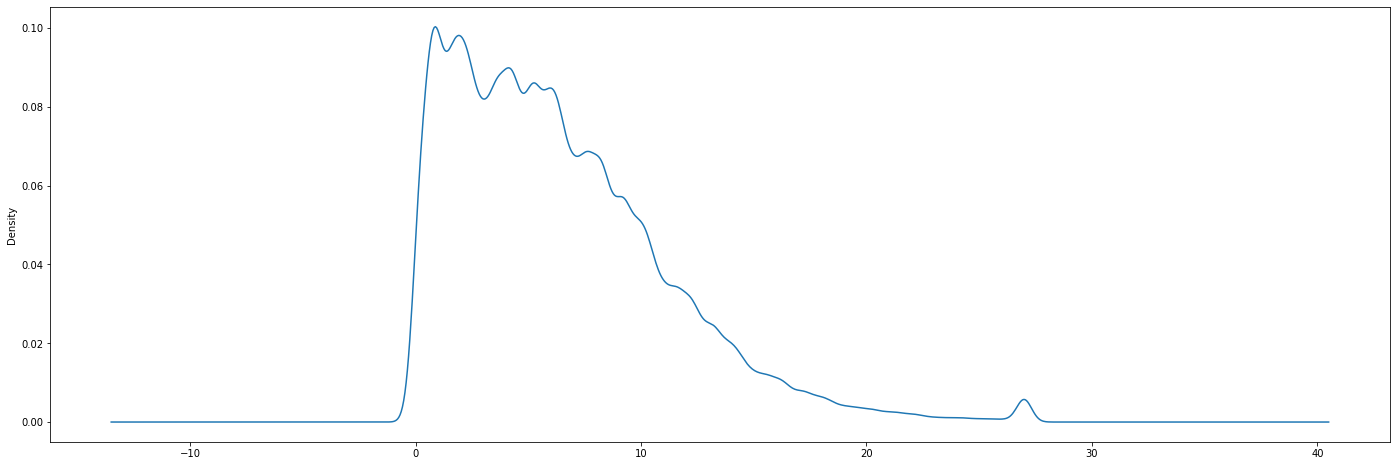

In [64]:

# Fix the Margin variables - is the same for 1 and 2
df_base['y_margin'] = df_base.apply(lambda x : 0 if x.position == '1' else 27 if x.Margin1 > 27 else x.Margin1, axis = 1) # capping at 99%ile of Margin1

df_base['y_margin'].plot(kind = 'density', figsize = (24,8))


In [65]:

# Create the y variable for position
df_base['y_pos'] = df_base['position'].astype(int)


In [66]:

# Checking the 99 percentile of the x_margin variable

#from scipy import stats
#stats.percentileofscore(df_base['x_margin'].values, 15, kind='mean')


In [67]:

df_base.describe()


,@id_DOG,Box,Rug,Weight,Handicap_DOG,Margin1,Margin2,Checks,SplitMargin,RunTime,Prizemoney,RaceId,TrainerId,RaceBox,Rating,DogPRIZE,@id_RACE,RaceNum,GOBIS,Hurdle,Handicap_RACE,ft_sp,x_num_dogs,position,y_margin,y_pos
count,6.417100e+05,641710.000000,641710.000000,641709.000000,0.0,641710.000000,552614.000000,641710.000000,534962.000000,641710.000000,441507.000000,6.417100e+05,641710.000000,639849.000000,641710.000000,6.398490e+05,6.417100e+05,641710.000000,0.0,0.0,0.0,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000
mean,4.716331e+08,4.477842,4.585492,29.935242,NaN,6.468379,2.066496,0.482101,7.274142,24.376636,429.389620,7.486843e+08,110851.114122,4.585473,81.945313,1.393480e+04,7.486843e+08,6.167685,NaN,NaN,NaN,17.041069,7.343669,4.169823,6.381256,4.169823
std,1.172652e+08,2.343897,2.432539,3.319049,NaN,8.533878,7.598734,1.521826,2.515334,4.943524,2818.691283,6.927769e+07,77738.478215,2.432556,28.141374,2.566634e+04,6.927769e+07,3.284732,NaN,NaN,NaN,21.141057,0.891946,2.162533,4.780226,2.162533
min,1.083910e+08,1.000000,1.000000,18.700000,NaN,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,6.238619e+08,6418.000000,1.000000,0.000000,0.000000e+00,6.238619e+08,1.000000,NaN,NaN,NaN,0.260000,5.000000,1.000000,0.000000,1.000000
25%,4.077278e+08,2.000000,2.000000,27.200000,NaN,2.510000,0.570000,0.000000,5.500000,20.530000,0.000000,6.892971e+08,65398.000000,2.000000,84.000000,2.670000e+03,6.892971e+08,3.000000,NaN,NaN,NaN,4.200000,7.000000,2.000000,2.510000,2.000000
50%,4.654220e+08,4.000000,4.000000,29.900000,NaN,5.500000,1.400000,0.000000,6.780000,23.510000,50.000000,7.506544e+08,99554.000000,4.000000,91.000000,7.698000e+03,7.506544e+08,6.000000,NaN,NaN,NaN,8.700000,8.000000,4.000000,5.500000,4.000000
75%,5.504112e+08,7.000000,7.000000,32.500000,NaN,9.090000,2.690000,0.000000,8.750000,27.010000,420.000000,8.077565e+08,124111.000000,7.000000,96.000000,1.672500e+04,8.077565e+08,9.000000,NaN,NaN,NaN,20.900000,8.000000,6.000000,9.090000,6.000000
max,2.145360e+09,8.000000,10.000000,55.000000,NaN,5229.500000,5100.140000,25.000000,30.660000,396.120000,1000000.000000,8.686263e+08,335886.000000,10.000000,100.000000,2.259370e+06,8.686263e+08,20.000000,NaN,NaN,NaN,999.990000,8.000000,8.000000,27.000000,8.000000


In [68]:

print(pd.DataFrame(df_base.isna().sum()).transpose())


   @id_DOG  Place  DogName  Box  Rug  Weight  StartPrice  Handicap_DOG  Margin1  Margin2    PIR  Checks  Comments  SplitMargin  RunTime  Prizemoney  RaceId  TrainerId  TrainerName  RaceBox  Rating  \
0        0      0        0    0    0       1           0        641710        0    89096  86193       0    310727       106748        0      200203       0          0            0     1861       0   

   DogGrade  DogGOBIS  DogPRIZE  @id_RACE  RaceNum  RaceName  RaceTime  Distance  RaceGrade  Track  date  Event_Dt  RaceTimeDateUTC   GOBIS  Hurdle  Handicap_RACE     TAB  GradeCode  racetime_fix  \
0         0      1861      1861         0        0        15         0         0          0      0     0         0            41207  641710  641710         641710  445100          0         41207   

   ft_sp  x_num_dogs  position  y_margin  y_pos  
0      0           0         0         0      0  


In [69]:

df_base.agg({'TrainerName':'nunique', 'Track':'nunique', 'DogName':'nunique'})


TrainerName     3632
Track             58
DogName        28211
dtype: int64

In [70]:

print(datetime.now().date())


2023-02-09


In [71]:

print(df_base.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos']


In [72]:

print(df_base.position.value_counts())


1    89096
2    88993
3    88945
4    88921
5    88880
6    83059
7    67066
8    46750
Name: position, dtype: int64


In [73]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random', 'RaceGrade', 'Track']

'''
cols_for_drop = [ 'Place', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin' \
                 , 'Prizemoney', 'TrainerId', 'TrainerName', 'RaceNum', 'RaceName', 'RaceTime', 'date' \
                 , 'rand_mean', 'rand_uniform']
'''

cols_for_drop = []

#'Event_Dt', 

todaydt = datetime.now().date()
exp_fname = f'raw_base_{todaydt}.csv'

exp_ds = df_base.drop( columns = cols_for_drop ).rename( columns = { 'RunTime' : 'y_runtime' } )


In [74]:
print(exp_fname)

raw_base_2023-02-09.csv


In [75]:

print(exp_ds.shape)


(641710, 45)


In [76]:

print(exp_ds.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos']


In [77]:

exp_ds.head()


,@id_DOG,Place,DogName,Box,Rug,Weight,StartPrice,Handicap_DOG,Margin1,Margin2,PIR,Checks,Comments,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,TrainerName,RaceBox,Rating,DogGrade,DogGOBIS,DogPRIZE,@id_RACE,RaceNum,RaceName,RaceTime,Distance,RaceGrade,Track,date,Event_Dt,RaceTimeDateUTC,GOBIS,Hurdle,Handicap_RACE,TAB,GradeCode,racetime_fix,ft_sp,x_num_dogs,position,y_margin,y_pos
3729,108390981,4,DOLLY DOES IT,5.0,5,30.4,$11.00,NaN,6.00,0.14,0,0,B3,NaN,26.43,80.0,626271182,92892,M Elphinstone,5.0,97.0,4,N,32060.0,626271182,10,GREAT NORTHERN,03:14PM,452m,Mixed 4/5,Devonport,05 Jan 21,2021-01-05,05 Jan 21 04:14AM,NaN,NaN,NaN,NaN,X45,15:14:00,11.0,8,4,6.00,4
9211,108390981,5,DOLLY DOES IT,4.0,4,30.2,$7.00,NaN,6.00,1.14,0,0,NaN,NaN,26.40,0.0,629797242,92892,M Elphinstone,4.0,95.0,5,N,32140.0,629797242,10,GREAT NORTHERN,03:09PM,452m,Grade 5,Devonport,12 Jan 21,2021-01-12,12 Jan 21 04:09AM,NaN,NaN,NaN,NaN,5,15:09:00,7.0,7,5,6.00,5
14917,108390981,1,DOLLY DOES IT,5.0,5,30.2,$7.00,NaN,5.25,NaN,0,0,NaN,8.1,26.20,1890.0,629797513,92892,M Elphinstone,5.0,90.0,5,N,32140.0,629797513,4,SUREPICK,01:27PM,452m,Grade 5,Devonport,19 Jan 21,2021-01-19,19 Jan 21 02:27AM,NaN,NaN,NaN,NaN,5,13:27:00,7.0,7,1,5.25,1
37110,108390981,7,DOLLY DOES IT,1.0,1,30.0,$7.00,NaN,10.50,2.00,0,0,NaN,NaN,26.48,0.0,638810808,92892,M Elphinstone,1.0,96.0,4,N,34030.0,638810808,8,LADBROKES,02:22PM,452m,Mixed 4/5 Heat,Devonport,16 Feb 21,2021-02-16,16 Feb 21 03:42AM,NaN,NaN,NaN,NaN,X45H,14:42:00,7.0,8,7,10.50,7
48421,108390981,8,DOLLY DOES IT,8.0,8,29.9,$91.00,NaN,18.50,3.57,0,0,SO,NaN,26.91,0.0,643554706,92892,M Elphinstone,8.0,85.0,4,N,34030.0,643554706,8,NEW RECRUIT 2012,02:22PM,452m,Grade 4,Devonport,02 Mar 21,2021-03-02,02 Mar 21 03:22AM,NaN,NaN,NaN,NaN,4,14:22:00,91.0,8,8,18.50,8


In [78]:

exp_ds.describe()


,@id_DOG,Box,Rug,Weight,Handicap_DOG,Margin1,Margin2,Checks,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,RaceBox,Rating,DogPRIZE,@id_RACE,RaceNum,GOBIS,Hurdle,Handicap_RACE,ft_sp,x_num_dogs,position,y_margin,y_pos
count,6.417100e+05,641710.000000,641710.000000,641709.000000,0.0,641710.000000,552614.000000,641710.000000,534962.000000,641710.000000,441507.000000,6.417100e+05,641710.000000,639849.000000,641710.000000,6.398490e+05,6.417100e+05,641710.000000,0.0,0.0,0.0,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000
mean,4.716331e+08,4.477842,4.585492,29.935242,NaN,6.468379,2.066496,0.482101,7.274142,24.376636,429.389620,7.486843e+08,110851.114122,4.585473,81.945313,1.393480e+04,7.486843e+08,6.167685,NaN,NaN,NaN,17.041069,7.343669,4.169823,6.381256,4.169823
std,1.172652e+08,2.343897,2.432539,3.319049,NaN,8.533878,7.598734,1.521826,2.515334,4.943524,2818.691283,6.927769e+07,77738.478215,2.432556,28.141374,2.566634e+04,6.927769e+07,3.284732,NaN,NaN,NaN,21.141057,0.891946,2.162533,4.780226,2.162533
min,1.083910e+08,1.000000,1.000000,18.700000,NaN,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,6.238619e+08,6418.000000,1.000000,0.000000,0.000000e+00,6.238619e+08,1.000000,NaN,NaN,NaN,0.260000,5.000000,1.000000,0.000000,1.000000
25%,4.077278e+08,2.000000,2.000000,27.200000,NaN,2.510000,0.570000,0.000000,5.500000,20.530000,0.000000,6.892971e+08,65398.000000,2.000000,84.000000,2.670000e+03,6.892971e+08,3.000000,NaN,NaN,NaN,4.200000,7.000000,2.000000,2.510000,2.000000
50%,4.654220e+08,4.000000,4.000000,29.900000,NaN,5.500000,1.400000,0.000000,6.780000,23.510000,50.000000,7.506544e+08,99554.000000,4.000000,91.000000,7.698000e+03,7.506544e+08,6.000000,NaN,NaN,NaN,8.700000,8.000000,4.000000,5.500000,4.000000
75%,5.504112e+08,7.000000,7.000000,32.500000,NaN,9.090000,2.690000,0.000000,8.750000,27.010000,420.000000,8.077565e+08,124111.000000,7.000000,96.000000,1.672500e+04,8.077565e+08,9.000000,NaN,NaN,NaN,20.900000,8.000000,6.000000,9.090000,6.000000
max,2.145360e+09,8.000000,10.000000,55.000000,NaN,5229.500000,5100.140000,25.000000,30.660000,396.120000,1000000.000000,8.686263e+08,335886.000000,10.000000,100.000000,2.259370e+06,8.686263e+08,20.000000,NaN,NaN,NaN,999.990000,8.000000,8.000000,27.000000,8.000000


In [79]:
print(datetime.now())

2023-02-09 09:31:56.189449


In [80]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)


In [81]:
print(datetime.now())

2023-02-09 09:39:43.439986


In [82]:

print('THE END')


THE END


In [ ]:
# 10 Min Export TIme